In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [50]:
tickers = ['FB', 'AAPl', 'AMZN', 'NFLX', 'GOOGL']  # list of tickers in our portfolio
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2005-1-1')['Adj Close']

In [51]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2132 entries, 2012-05-18 to 2020-11-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      2132 non-null   float64
 1   AAPl    2132 non-null   float64
 2   AMZN    2132 non-null   float64
 3   NFLX    2132 non-null   float64
 4   GOOGL   2132 non-null   float64
dtypes: float64(5)
memory usage: 99.9 KB


In [52]:
mydata.head()

,FB,AAPl,AMZN,NFLX,GOOGL
Date,,,,,
2012-05-18,38.230000,16.368652,213.850006,9.994286,300.500488
2012-05-21,34.029999,17.322281,218.110001,10.248571,307.362366
2012-05-22,31.000000,17.189274,215.330002,9.672857,300.700714
2012-05-23,32.000000,17.608683,217.279999,10.272857,305.035034
2012-05-24,33.029999,17.446974,215.240005,10.038571,302.132141


In [53]:
mydata.tail()

,FB,AAPl,AMZN,NFLX,GOOGL
Date,,,,,
2020-10-30,263.109985,108.860001,3036.149902,475.739990,1616.109985
2020-11-02,261.359985,108.769997,3004.479980,484.119995,1624.319946
2020-11-03,265.299988,110.440002,3048.409912,487.220001,1645.660034
2020-11-04,287.380005,114.949997,3241.159912,496.950012,1745.849976
2020-11-05,294.679993,119.029999,3322.000000,513.760010,1762.500000


In [54]:
mydata.iloc[0] # iloc[x] returns the x row of data, with 0 representing the 1st row

FB        38.230000
AAPl      16.368652
AMZN     213.850006
NFLX       9.994286
GOOGL    300.500488
Name: 2012-05-18 00:00:00, dtype: float64

.iloc[x] returns the xth row of data

Instead we could have used .loc() function but instead of using x we would have had to state the label of the row we wanted e.g. .loc('1997-02-5')

This would be more useful if we wanted to pull a specific row and didnt know what number the row was

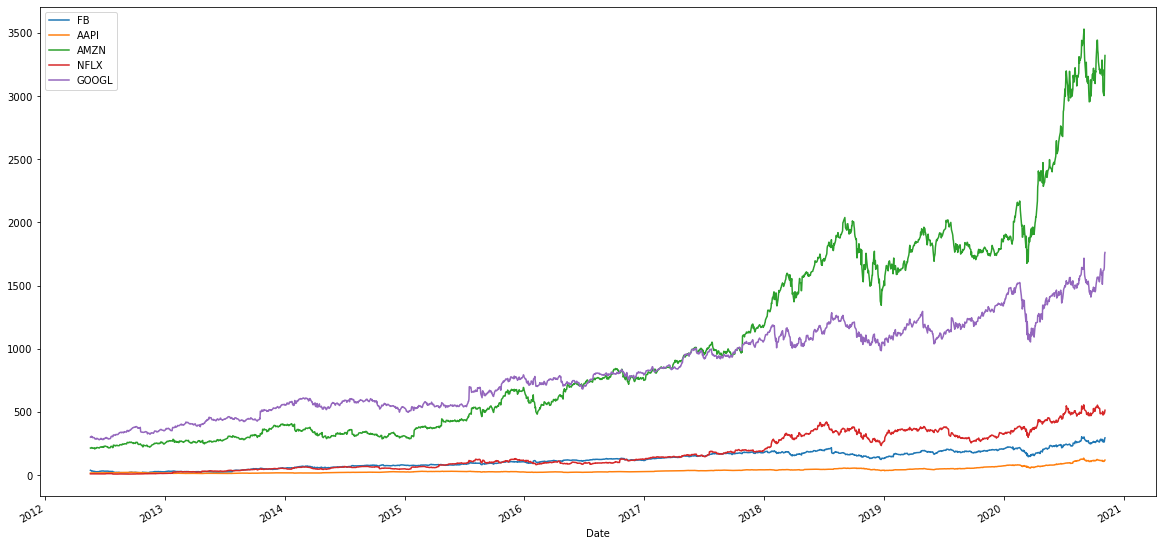

In [63]:
mydata.plot(figsize=(20,10))
plt.show()

Now I want a graph that can directly compare our stocks, hence I will use the formula (Pi/P_0)*100 
Pi is the adj close price of the stock on day i 
P_0 is the adj close price on day 1 from the chosen timeframe

The first day divided by the first day will always give 1. Multiplied by 100 will always give 100 for each stock - hence each stock will start at 100 on the graph and we can directly compare their growth

This is the process of Normalisation

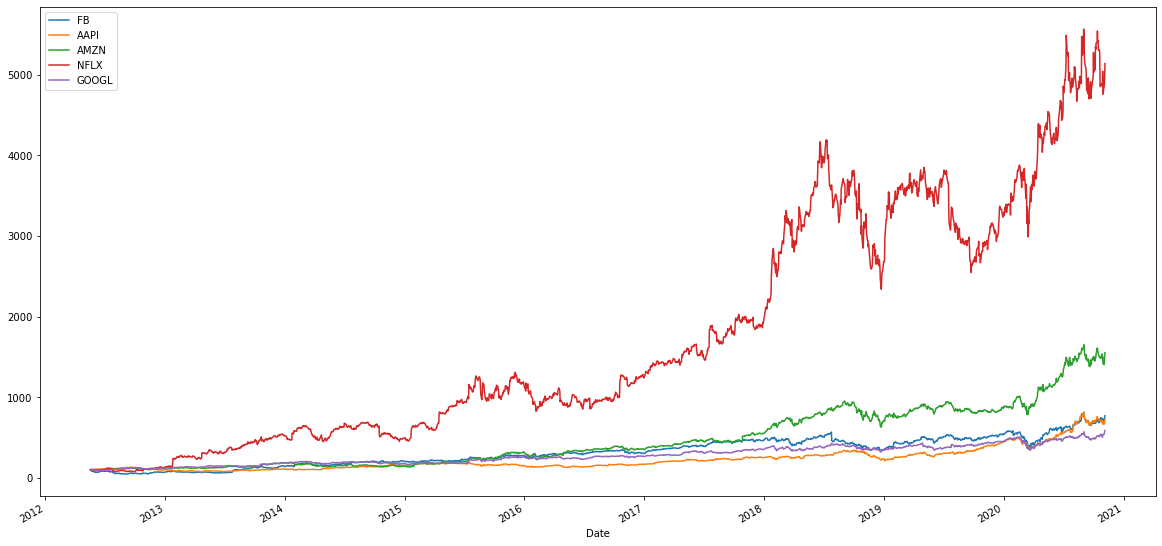

In [56]:
((mydata/mydata.iloc[0])*100).plot(figsize=(20,10))
plt.show()

Now we want to calculate the returns of these stocks over this period, and plot these in a new table

In [57]:
returns = (mydata/mydata.shift(1)) - 1
returns.head()

,FB,AAPl,AMZN,NFLX,GOOGL
Date,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.058259,0.019920,0.025443,0.022835
2012-05-22,-0.089039,-0.007678,-0.012746,-0.056175,-0.021674
2012-05-23,0.032258,0.024399,0.009056,0.062029,0.014414
2012-05-24,0.032187,-0.009183,-0.009389,-0.022806,-0.009517


Let's apply a weighting to the stocks in the portfolio. The weight of each stock will determine the percentage of the portolfio that it takes up, i.e. its importance 

In [65]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Assume an equal weighting for all 5 stocks - remember a portfolios weights must always add up to 1

Now we want to multiply returns by weights to apply the weighting, but both these are in matrices so we will will have to use numpys .dot() function which can multiply vectors or matrices

In [66]:
np.dot(returns, weights)  # this is the dot product of the variables

array([        nan,  0.0033193 , -0.03746239, ...,  0.01291825,
        0.05362893,  0.02584011])

The reason this looks odd is because we multiplied each value of the returns table with the weights

to fix this we will first have to calculate the average return of each stocks price first 

In [69]:
annual_returns = returns.mean()*250  # we multiply by 250 because that is the number of trading days in the year
annual_returns

FB       0.309015
AAPl     0.273702
AMZN     0.367844
NFLX     0.573990
GOOGL    0.239523
dtype: float64

In [70]:
np.dot(annual_returns, weights)

0.3528146697406762

Now we can make this look nicer by changing it to a percentage

In [108]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 4) * 100) + ' %'  # rounds the number to 4 digits, multiplies by 100 and then adds percentage sign
print(pfolio_1)

35.28 %


Now lets say we wanted to have another portfolio of the same stocks but with different weightings

In [109]:
weights_2 = ([0.4, 0.3, 0.1, 0.1, 0.1])  # chosen weighting for portfolio 2

In [110]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 4) * 100) + ' %'
print(pfolio_2)

32.39 %


In [111]:
# lets directly compare the returns of the 2 portfolios now

In [112]:
print(pfolio_1) 
print(pfolio_2)


35.28 %
32.39 %
